# K-Means Clustering Assignments

**Student ID:** 63130500113

**Student Name:** Sahathat Yingsakulkiet

---

## Assignment 1: Clustering Synthetic Data 2D Using Silhouette Coefficient

### Objective:
Understand the concept of K-means clustering and determine the optimal number of clusters using the Silhouette Coefficient.

### Tasks:
1. Generate a synthetic 2D dataset with 4-5 distinct clusters using libraries like `sklearn.datasets.make_blobs`.
2. Visualize the dataset using a scatter plot.
3. Implement K-means clustering for a range of cluster numbers (e.g., 2 to 10).
4. For each cluster number, compute the Silhouette Coefficient.
5. Plot the Silhouette Coefficient values against the number of clusters to visualize the optimal number of clusters.
6. Visualize the clusters for the optimal number of clusters using a scatter plot.
7. Write a brief report discussing your findings.

---

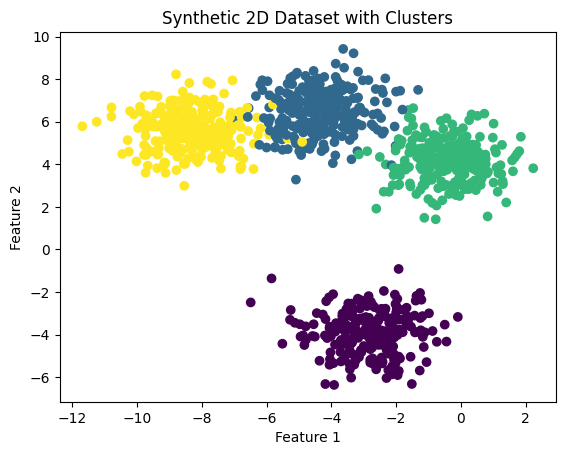

C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: 

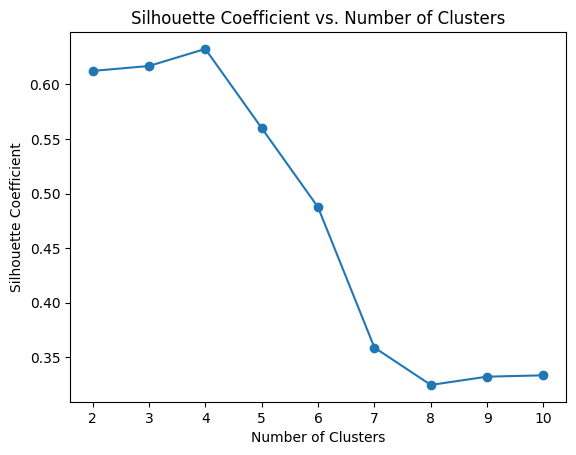

C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


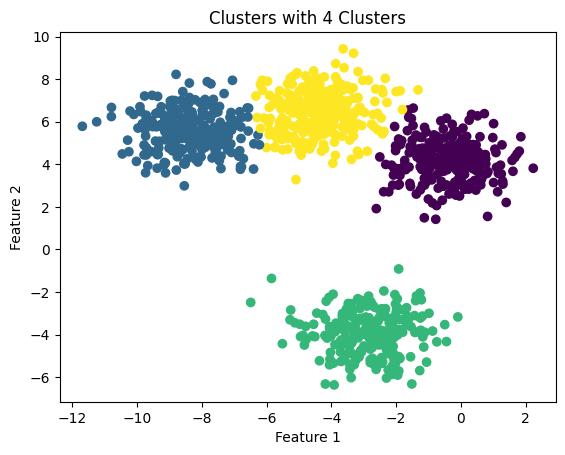

Optimal number of clusters: 4
Silhouette Coefficient for optimal clusters: 0.6325186195405239


In [9]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Generate synthetic dataset
n_samples = 1000
n_features = 2
n_clusters = 4
random_state = math.floor(1000*random.random())

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Step 2: Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Synthetic 2D Dataset with Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 3 and 4: K-means clustering and Silhouette Coefficient
range_clusters = range(2, 11)
silhouette_scores = []

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Step 5: Plot Silhouette Coefficient vs. Number of Clusters
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Coefficient vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.xticks(range_clusters)
plt.show()

# Step 6: Visualize clusters for the optimal number of clusters
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
optimal_kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=random_state)
optimal_cluster_labels = optimal_kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=optimal_cluster_labels, cmap='viridis')
plt.title(f"Clusters with {optimal_n_clusters} Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 7: Write a brief report
print(f"Optimal number of clusters: {optimal_n_clusters}")
print(f"Silhouette Coefficient for optimal clusters: {max(silhouette_scores)}")


## Assignment 2: Clustering Synthetic Data 2D Using Inertia

### Objective:
Understand the concept of K-means clustering and determine the optimal number of clusters using inertia.

### Tasks:
1. Generate a synthetic 2D dataset with 4-5 distinct clusters using libraries like `sklearn.datasets.make_blobs`.
2. Visualize the dataset using a scatter plot.
3. Implement K-means clustering for a range of cluster numbers (e.g., 2 to 10).
4. For each cluster number, compute the inertia.
5. Plot the inertia values against the number of clusters to visualize the "elbow" point.
6. Visualize the clusters for the optimal number of clusters using a scatter plot.
7. Write a brief report discussing your findings.

---

## Assignment 3: Segmenting Patients

### Objective:
Segment patients based on selected health metrics.

### Dataset Suggestion:
Diabetes dataset from UCI Machine Learning Repository.

### Tasks:
1. Load the diabetes dataset.
2. Perform exploratory data analysis to understand the features and distributions.
3. Select two features that seem most relevant or interesting for clustering (e.g., glucose levels and age).
4. Visualize the selected features using a scatter plot.
5. Implement K-means clustering for a range of cluster numbers.
6. Determine the optimal number of clusters using either the Silhouette Coefficient or inertia.
7. Visualize the clusters using a scatter plot.
8. Analyze the characteristics of each cluster to understand the segmentation.
9. Write a report discussing the patient segments based on the selected features, potential implications, or uses of these segments in healthcare.

---

## Assignment 4: Clustering Penguins and Evaluating with External Measure

### Objective:
Cluster the penguin dataset and evaluate the clustering results using an external measure.

### Dataset:
Palmer Penguins dataset, available in the `seaborn` library or on GitHub.

### Tasks:
1. Load the Palmer Penguins dataset.
2. Perform exploratory data analysis to understand the features and distributions.
3. Preprocess the data: handle missing values, encode categorical variables, and normalize the data.
4. Implement K-means clustering.
5. Determine the optimal number of clusters using either the Silhouette Coefficient or inertia.
6. Visualize the clusters using appropriate visualization techniques.
7. Use an external measure (e.g., Adjusted Rand Index, Normalized Mutual Information) to evaluate the clustering results against the true species labels.
8. Write a report discussing your findings, the effectiveness of the clustering, and the evaluation results using the external measure.